In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(
    root = './data', 
    train=True, 
    download=True,
    transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=4, 
    shuffle=True,
    num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root = './data', 
    train=False, 
    download=True,
    transform=transform)

testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=4, 
    shuffle=False,
    num_workers=2)

0it [00:00, ?it/s]Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data\cifar-10-python.tar.gz
100%|█████████▉| 170385408/170498071 [01:53<00:00, 593809.71it/s]Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

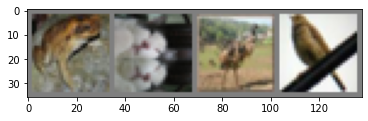

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + .5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
from NeuralNetworksTutorialNetClass import Net
import torch.nn as nn

In [12]:
net = Net()

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

In [14]:
for epoch in range(2):
    running_loss = 0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data

        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished')

[1,  2000] loss: 2.238
[1,  4000] loss: 1.928
[1,  6000] loss: 1.705
[1,  8000] loss: 1.600
[1, 10000] loss: 1.513
[1, 12000] loss: 1.445
[2,  2000] loss: 1.350
[2,  4000] loss: 1.323
[2,  6000] loss: 1.302
[2,  8000] loss: 1.254
[2, 10000] loss: 1.231
[2, 12000] loss: 1.214
Finished


In [15]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)

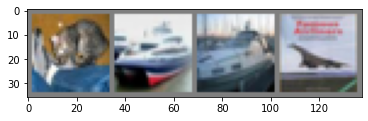

GroundTruth:    cat  ship  ship plane


In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
outputs = net(images)

In [19]:
_, predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)